In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler


In [2]:

df=pd.read_csv('/home/root1/Downloads/iris(For PCA Program).csv')
df.head()


,sepal length,sepal width,petal length,petal width,species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [3]:
X = df.drop(['species'],axis=1)

X_scaled = StandardScaler().fit_transform(X)
X_scaled[:5]

y=df['species']

features = X_scaled.T
cov_matrix = np.cov(features)
cov_matrix[:5]

values, vectors = np.linalg.eig(cov_matrix)
values[:5]

vectors[:5]

explained_variances = []
for i in range(len(values)):
    explained_variances.append((values[i] / np.sum(values))*100)

print("variances of each feature",explained_variances)


variances of each feature [72.96244541329987, 22.850761786701757, 3.6689218892828763, 0.5178709107154831]


,PC1,PC2,Y
0,-2.264703,-0.480027,1
1,-2.080961,0.674134,1
2,-2.364229,0.341908,1
3,-2.299384,0.597395,1
4,-2.389842,-0.646835,1


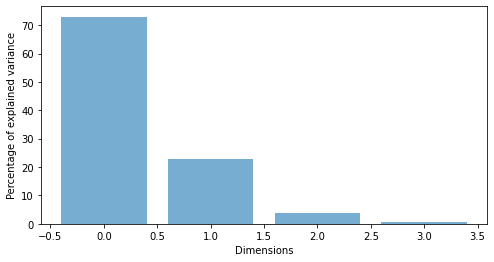

In [4]:
plt.figure(figsize=(8,4))
plt.bar(range(4),explained_variances, alpha=0.6)
plt.ylabel('Percentage of explained variance')
plt.xlabel('Dimensions')

projected_1 = X_scaled.dot(vectors.T[0])
projected_2 = X_scaled.dot(vectors.T[1])
res = pd.DataFrame(projected_1, columns=['PC1'])
res['PC2'] = projected_2
res['Y'] = y
res.head()

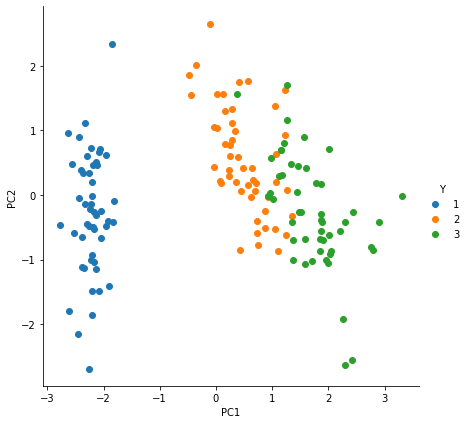

In [5]:
sns.FacetGrid(res, hue="Y", height=6).map(plt.scatter, 'PC1', 'PC2').add_legend()
plt.show()